<h1 style="color:DarkOrange" >Netflix Data Analysis: Trends and Insights</h1>

## <span style="color:MediumSeaGreen">Objectives</span>

- To determine the year which recorded the highest number of TV shows and Movies 

- Which movies were release in the year 2000 

- Determine the number of Movie and TV shows 

- Identify the top 10 directors who gave the highest number of TV shows and Movies on Netflix 

- Identify the number of Movies Tom Cruise cast. 

- Determine the Movie/Show with the maximum duration on Netflix 

- To Identify country with the highest number of TV shows 

## <span style="color:MediumSeaGreen">Import and Read Data</span>

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [225]:
# Read data
data_path = '/workspaces/PythonSpace/Datasource/Project/Netflix_dataset.csv'
df_raw = pd.read_csv(data_path)

In [226]:
df_raw.head(3)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


## <span style="color:MediumSeaGreen">Data Cleaning</span>

In [227]:
df_unclean = df_raw

In [228]:
df_unclean.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [229]:
# Change column names
start_column_names = ['show_id', 'category', 'title', 'director','cast','country', 'release_date', 'rating','duration','type','description']

df_unclean.columns = start_column_names
df_unclean.head(3)

,show_id,category,title,director,cast,country,release_date,rating,duration,type,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [230]:
df_unclean['release_year'] = pd.to_datetime(df_unclean['release_date'], errors='coerce').dt.year.astype('Int64')

In [231]:
# Reorder and Remove show_id
reorder_column_names = ['show_id','release_year' ,'category', 'title', 'director','cast','country' ,'release_date', 'rating','duration','type','description']
df_unclean = df_unclean[reorder_column_names]

In [232]:
data_index = 'show_id'
if data_index in df_unclean.columns:
    df_unclean = df_unclean.set_index(data_index)
df_unclean.head(3)

,release_year,category,title,director,cast,country,release_date,rating,duration,type,description
show_id,,,,,,,,,,,
s1,2020,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,2016,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,2018,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [233]:
def getUnique(column):
    result = 'Nothing to show'
    if column in df_unclean.columns:
        unique_values = df_unclean[column].unique()
        result = f'|{column}| uinque values [{len(unique_values)}] : {unique_values}'
    print(result)

In [234]:
df_unclean.head(3)

,release_year,category,title,director,cast,country,release_date,rating,duration,type,description
show_id,,,,,,,,,,,
s1,2020,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,2016,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,2018,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


## <span style="color:MediumSeaGreen">Data Exploration and Visualization</span>

In [235]:
df_explore = df_unclean

In [236]:
df_explore.head(3)

,release_year,category,title,director,cast,country,release_date,rating,duration,type,description
show_id,,,,,,,,,,,
s1,2020,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,2016,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,2018,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [237]:
# Number of Movie and TV shows 
number_of_movies = df_explore.loc[df_explore['category'] == 'Movie', 'category'].count()
number_of_tvshow = df_explore.loc[df_explore['category'] == 'TV Show', 'category'].count()

print(f'Number of movies = {number_of_movies}')
print(f'Number of TV Shows = {number_of_tvshow}')

Number of movies = 5379
Number of TV Shows = 2410


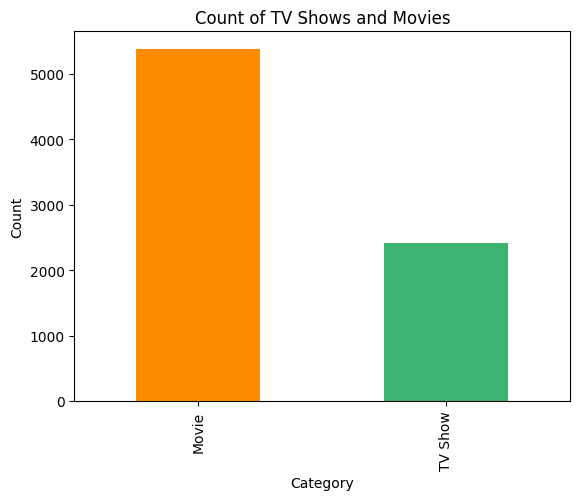

In [239]:
table_category = df_explore.groupby('category').count()['title']

table_category.plot(kind='bar', color=['DarkOrange', 'MediumSeaGreen'], xlabel="Category")
plt.title('Count of TV Shows and Movies')
plt.ylabel('Count')
plt.show()

In [ ]:
# The Year which recorded the highest number of TV shows and Movies
year_highest_category = df_explore.groupby('release_year')['category'].count().idxmax()
year_highest_category = int(df_explore.groupby('release_year')['category'].count().idxmax())

print(f'Year with highest number of TV shows and Moview = {year_highest_category}')

Year with highest number of TV shows and Moview = 2019


In [ ]:
year_highest_movie = df_explore.loc[
    df_explore['category'] == 'Movie', ['release_year', 'category']
    ].groupby('release_year').count().idxmax().iloc[0]

year_highest_tvshow = df_explore.loc[
    df_explore['category'] == 'TV Show', ['release_year', 'category']
    ].groupby('release_year').count().idxmax().iloc[0]

print(f'Year with highest Movies = {year_highest_movie}')
print(f'Year with highest TV Shows = {year_highest_tvshow}')

Year with highest Movies = 2019
Year with highest TV Shows = 2020


In [ ]:
table_year_category = df_explore.groupby(['release_year', 'category']).size().unstack().fillna(0).astype('Int64')
table_year_category

category,Movie,TV Show
release_year,,
2008,1,1
2009,2,0
2010,1,0
2011,13,0
2012,3,0
2013,6,4
2014,19,5
2015,58,21
2016,258,174


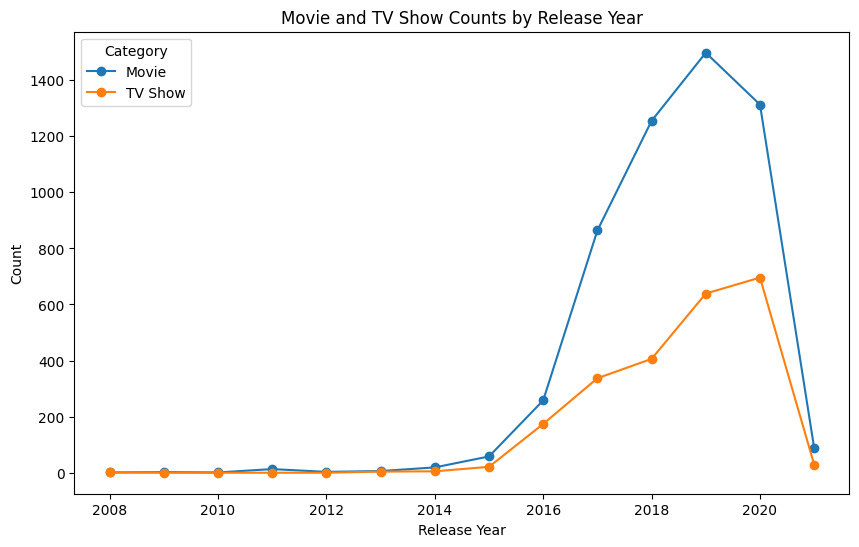

In [240]:
# Movies released in the year 2000 
table_year_category.plot(kind='line', marker='o', figsize=(10, 6), xlabel="Release Year")

plt.ylabel('Count')
plt.title('Movie and TV Show Counts by Release Year')
plt.legend(title='Category')

plt.show()


In [ ]:
# Top 10 directors who gave the highest number of TV shows and Movies on Netflix 


In [ ]:

# Number of Movies Tom Cruise cast. 



In [ ]:
# Movie/Show with the maximum duration on Netflix 



In [ ]:
# Country with the highest number of TV shows 

## <span style="color:MediumSeaGreen">Key Findings</span>